In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Read the CSV file skipping the first 20 rows

df = pd.read_csv(r'Maroua_Hour_1980-01-01_2020-12-31_543627210.csv' , low_memory=False, header=22, sep=';')

# Save the DataFrame to a new CSV file

df.to_csv('maroua.csv', index=False)
df.head()


# Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  1980-01-01   01:00       293.23              25.33    963.18        4.93   
1  1980-01-01   02:00       292.54              26.56    962.91        4.70   
2  1980-01-01   03:00       291.81              28.10    962.98        4.42   
3  1980-01-01   04:00       291.16              29.71    963.50        4.32   
4  1980-01-01   05:00       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [5]:
df = pd.read_csv('maroua.csv', sep=',', header=0)

# Rename the first column by removing the '#'character

df.rename(columns={df.columns[0]: df.columns[0].lstrip(' #')}, inplace=True)
df.head()



Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  1980-01-01   01:00       293.23              25.33    963.18        4.93   
1  1980-01-01   02:00       292.54              26.56    962.91        4.70   
2  1980-01-01   03:00       291.81              28.10    962.98        4.42   
3  1980-01-01   04:00       291.16              29.71    963.50        4.32   
4  1980-01-01   05:00       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [6]:
print(df.describe())

         Temperature  Relative Humidity       Pressure     Wind speed  \
count  359424.000000      359424.000000  359424.000000  359424.000000   
mean      300.723875          44.499646     962.117926       3.462048   
std         5.763811          29.039721       2.389831       1.597747   
min       282.170000           1.470000     951.050000       0.010000   
25%       296.530000          16.660000     960.630000       2.250000   
50%       300.010000          40.200000     962.330000       3.310000   
75%       304.670000          71.820000     963.760000       4.500000   
max       317.590000          98.390000     972.710000      12.320000   

       Wind direction       Rainfall  Snowfall  Snow depth  \
count   359424.000000  359424.000000  359424.0    359424.0   
mean       155.306703       0.051813       0.0         0.0   
std        110.922434       0.271603       0.0         0.0   
min          0.000000       0.000000       0.0         0.0   
25%         39.320000       0.00

In [7]:
# Check for null values in each column
null_columns = df.isna().any()
# Check for null values in the entire DataFrame
null_dataframe = df.isna().any().any()
# Display the results
print("Null values in each column:\n", null_columns)
print("\nNull values in the entire DataFrame:", null_dataframe)

Null values in each column:
 Date                      False
UT time                   False
Temperature               False
Relative Humidity         False
Pressure                  False
Wind speed                False
Wind direction            False
Rainfall                  False
Snowfall                  False
Snow depth                False
Short-wave irradiation    False
dtype: bool

Null values in the entire DataFrame: False


In [8]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Convert the date column to ordinal representation
df['Date'] = df['Date'].apply(lambda x: x.toordinal())
# Check the updated DataFrame
df.head()

Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815   01:00       293.23              25.33    963.18        4.93   
1  722815   02:00       292.54              26.56    962.91        4.70   
2  722815   03:00       291.81              28.10    962.98        4.42   
3  722815   04:00       291.16              29.71    963.50        4.32   
4  722815   05:00       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [9]:
# Split the time string into hours and minutes
split_time = df['UT time'].str.split(':')
# Extract hours and minutes from the split result
hours = split_time.str[0].astype(int)
minutes = split_time.str[1].astype(int)
# Combine hours and minutes into a single numerical representation (e.g., minutes since midnight)
time_numeric = hours * 60 + minutes
# Replace the original time column with the new numerical representation
df['UT time'] = time_numeric
# Check the updated DataFrame
df.head()

Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       293.23              25.33    963.18        4.93   
1  722815      120       292.54              26.56    962.91        4.70   
2  722815      180       291.81              28.10    962.98        4.42   
3  722815      240       291.16              29.71    963.50        4.32   
4  722815      300       290.48              31.57    964.17        4.16   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [10]:

# Convert the wind speed data to the desired units (e.g., from m/s to knots)
df['Wind speed'] = df['Wind speed'] * 1.94384  # Conversion from m/s to knots

# Optionally, drop the original 'Wind Speed' column
# df.drop(columns=['Wind Speed'], inplace=True)

df.head()

Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       293.23              25.33    963.18    9.583131   
1  722815      120       292.54              26.56    962.91    9.136048   
2  722815      180       291.81              28.10    962.98    8.591773   
3  722815      240       291.16              29.71    963.50    8.397389   
4  722815      300       290.48              31.57    964.17    8.086374   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          349.55       0.0       0.0         0.0                     0.0  
1          351.43       0.0       0.0         0.0                     0.0  
2          353.77       0.0       0.0         0.0                     0.0  
3          358.58       0.0       0.0         0.0                     0.0  
4            3.22       0.0       0.0         0.0                     0.0

In [11]:
column_list = df.columns.tolist()
column_list

['Date',
 'UT time',
 'Temperature',
 'Relative Humidity',
 'Pressure',
 'Wind speed',
 'Wind direction',
 'Rainfall',
 'Snowfall',
 'Snow depth',
 'Short-wave irradiation']

In [12]:
# Drop the columns that are not in correlation
df = df.drop(columns=[
                      'Snowfall',
                      'Snow depth',
                    ])
# Check the updated DataFrame
df.head()


Date  UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  722815       60       293.23              25.33    963.18    9.583131   
1  722815      120       292.54              26.56    962.91    9.136048   
2  722815      180       291.81              28.10    962.98    8.591773   
3  722815      240       291.16              29.71    963.50    8.397389   
4  722815      300       290.48              31.57    964.17    8.086374   

   Wind direction  Rainfall  Short-wave irradiation  
0          349.55       0.0                     0.0  
1          351.43       0.0                     0.0  
2          353.77       0.0                     0.0  
3          358.58       0.0                     0.0  
4            3.22       0.0                     0.0

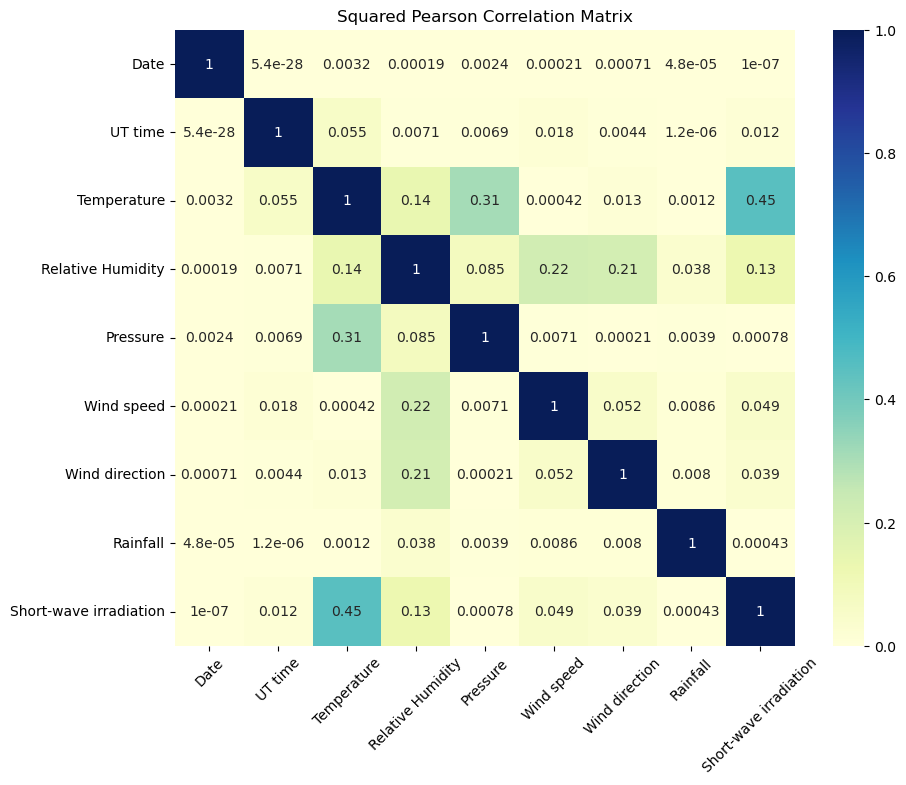

In [13]:
import seaborn as sns

# Compute correlation matrix using Pearson correlation method

corr_matrix = df.corr(method='pearson') ** 2 # Square each correlation coefficient

# Plot correlation matrix as a heatmap

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=0, vmax=1)
# Set the feature names as labels for both axes
plt.xticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)) + 0.5, corr_matrix.columns, rotation=0)
plt.title("Squared Pearson Correlation Matrix")
plt.show()

In [14]:
df.corr()


Date       UT time  Temperature  \
Date                    1.000000e+00 -2.333244e-14     0.056590   
UT time                -2.333244e-14  1.000000e+00     0.235119   
Temperature             5.658974e-02  2.351186e-01     1.000000   
Relative Humidity      -1.360902e-02 -8.420012e-02    -0.373751   
Pressure                4.854230e-02 -8.296674e-02    -0.556230   
Wind speed             -1.439992e-02 -1.348708e-01     0.020390   
Wind direction         -2.672027e-02 -6.611543e-02    -0.113071   
Rainfall                6.963016e-03 -1.107623e-03    -0.034108   
Short-wave irradiation -3.211713e-04 -1.100065e-01     0.670872   

                        Relative Humidity  Pressure  Wind speed  \
Date                            -0.013609  0.048542   -0.014400   
UT time                         -0.084200 -0.082967   -0.134871   
Temperature                     -0.373751 -0.556230    0.020390   
Relative Humidity                1.000000  0.290977   -0.466285   
Pressure                         0.290977  1.000000    0.084472   
Wind speed                      -0.466285  0.084472    1.000000   
Wind direction                   0.459852 -0.014359   -0.227566   
Rainfall                         0.195175  0.062716   -0.092718   
Short-wave irradiation          -0.357365 -0.027995    0.221524   

                        Wind direction  Rainfall  Short-wave irradiation  
Date                         -0.026720  0.006963               -0.000321  
UT time                      -0.066115 -0.001108               -0.110006  
Temperature                  -0.113071 -0.034108                0.670872  
Relative Humidity             0.459852  0.195175               -0.357365  
Pressure                     -0.014359  0.062716               -0.027995  
Wind speed                   -0.227566 -0.092718                0.221524  
Wind direction                1.000000  0.089560               -0.196886  
Rainfall                      0.089560  1.000000               -0.020660  
Short-wave irradiation       -0.196886 -0.020660                1.000000

In [15]:
# Drop the columns that are not in correlation
df = df.drop(columns=['Date',
                      'UT time',
                      'Pressure',
                      'Wind direction',
                      'Rainfall',
                    ])
# Check the updated DataFrame
df.head()


Temperature  Relative Humidity  Wind speed  Short-wave irradiation
0       293.23              25.33    9.583131                     0.0
1       292.54              26.56    9.136048                     0.0
2       291.81              28.10    8.591773                     0.0
3       291.16              29.71    8.397389                     0.0
4       290.48              31.57    8.086374                     0.0

In [16]:
 #Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# Split the dataset
train, valid, test = np.split(df, [int(0.6*len(df)), int(0.8*len(df))])
# Check the sizes of the splits
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Training set size: 215654
Validation set size: 71885
Test set size: 71885


C:\Users\Millen\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
from sklearn.preprocessing import RobustScaler
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
# Initialize the scaler
    scaler = RobustScaler()
# Fit the scaler on the training data and transform it
    X = scaler.fit_transform(X)
    return X, y

train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)


In [18]:

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title):
    # Calculate R²
    r2_rf = r2_score(test_y, predictions)
    # Calculate RMSE
    rmse_rf = np.sqrt(mean_squared_error(test_y, predictions))
    # Calculate Relative RMSE (rRMSE)
    rrmse_rf = rmse_rf / np.std(test_y)
    # Calculate Mean Bias Error (MBE)
    mbe_rf = np.mean(predictions - test_y)
    # Calculate Mean Absolute Bias Error (MABE)
    mabe_rf = np.mean(np.abs(predictions - test_y))
    # Calculate Mean Absolute Error (MAE)
    mae_rf = mean_absolute_error(test_y, predictions)
    # Calculate Mean Squared Error (MSE)
    mse_rf = mean_squared_error(test_y, predictions)
    # Calculate Akaike Information Criterion (AIC)
    aic_rf = len(test_y) * np.log(mse_rf) + 2

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE', 'AIC'],
        'Value': [r2_rf, rmse_rf, rrmse_rf, mbe_rf, mabe_rf, mae_rf, mse_rf, aic_rf]
    })
    # Print the evaluation table with formatted values
    print(title)
    pd.options.display.float_format = '{:.6f}'.format
    print(evaluation_table)

    return evaluation_table

# Example usage (assuming you have predictions and test_y already):
# evaluation_table = evaluate_model(predictions, test_y, "Model Evaluation Metrics")

In [19]:
import matplotlib.pyplot as plt
def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):

    # Calculate error curve
    error_curve = test_y - predictions
    # Set figure size
    plt.figure(figsize=(20, 6))
    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Wind speed m/s')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions))) # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error m/s')
    plt.ylim(bottom=min(error_curve), top=max(error_curve)) # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    plt.legend()
    # Show plot
    plt.tight_layout()
    plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
linear_reg = LinearRegression()
# Train the model
linear_reg.fit(train_X_scaled, train_y)
# Predict on the test set
predictions_reg = linear_reg.predict(test_X_scaled)
# Evaluation
evaluate_model(predictions_reg, test_y, "Maroua Metrics Evaluation for Milti Linear Regression Models")


Maroua Metrics Evaluation for Milti Linear Regression Models
  Metric         Value
0     R²      0.493419
1   RMSE    228.704111
2  rRMSE      0.711745
3    MBE      0.901389
4   MABE    182.070694
5    MAE    182.070694
6    MSE  52305.570612
7    AIC 781022.328619


Metric         Value
0     R²      0.493419
1   RMSE    228.704111
2  rRMSE      0.711745
3    MBE      0.901389
4   MABE    182.070694
5    MAE    182.070694
6    MSE  52305.570612
7    AIC 781022.328619

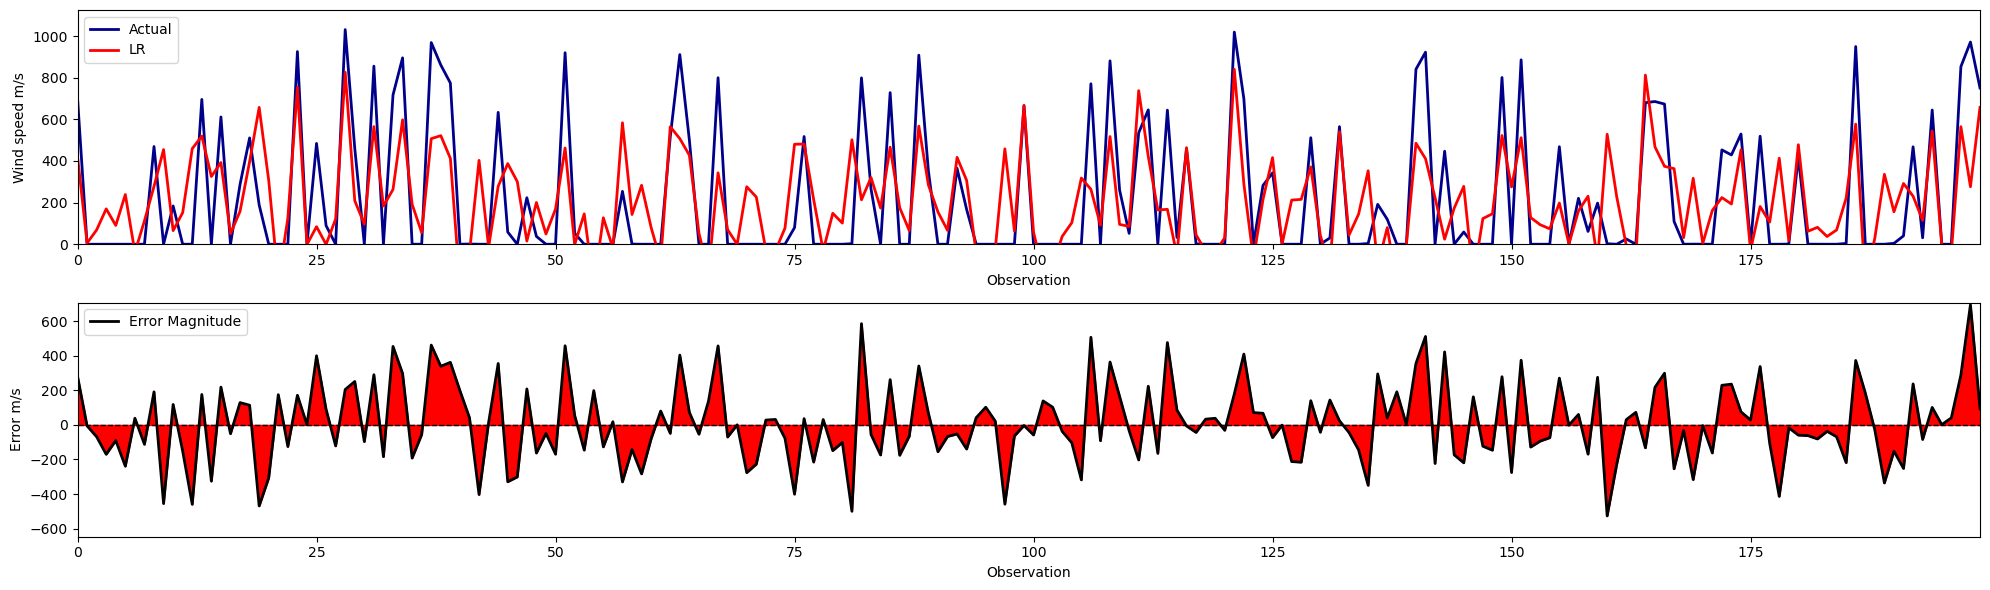

In [21]:
plot_actual_vs_predicted(test_y, predictions_reg, label='LR')


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create a decision tree regressor model
model = DecisionTreeRegressor(random_state=1000)
# Train the model
model.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_dt = model.predict(test_X_scaled)
# Evaluate the model
mse = mean_squared_error(test_y, predictions_dt)
mae = mean_absolute_error(test_y, predictions_dt)
r2 = r2_score(test_y, predictions_dt)
evaluate_model(predictions_dt, test_y, "Maroua Metrics Evaluation for Decision Tree Models")


Maroua Metrics Evaluation for Decision Tree Models
  Metric         Value
0     R²      0.218414
1   RMSE    284.078152
2  rRMSE      0.884074
3    MBE      2.741236
4   MABE    174.829058
5    MAE    174.829058
6    MSE  80700.396433
7    AIC 812194.583843


Metric         Value
0     R²      0.218414
1   RMSE    284.078152
2  rRMSE      0.884074
3    MBE      2.741236
4   MABE    174.829058
5    MAE    174.829058
6    MSE  80700.396433
7    AIC 812194.583843

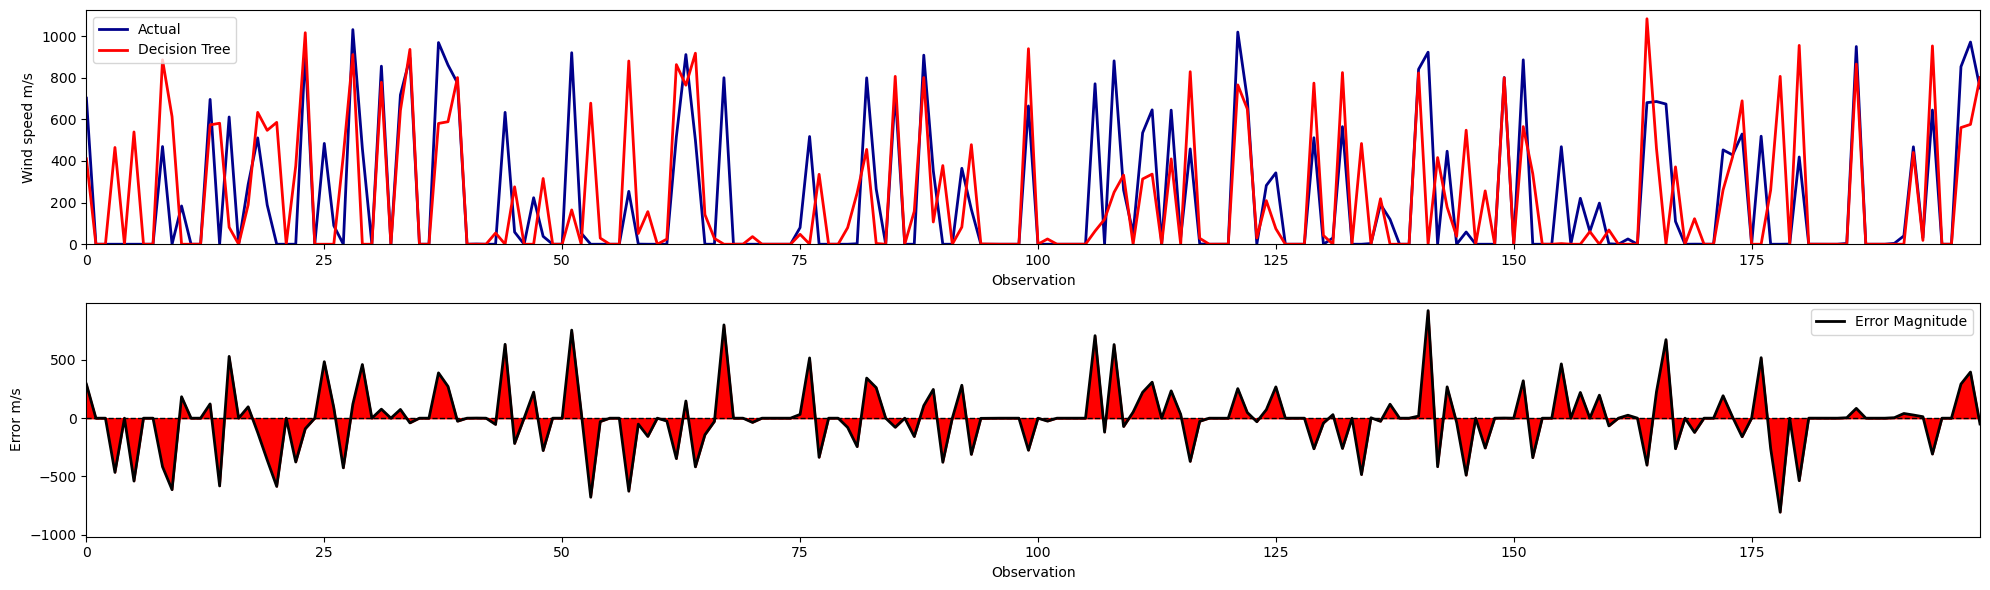

In [23]:
plot_actual_vs_predicted(test_y, predictions_dt, label='Decision Tree')


In [22]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest regressor model
model_rf = RandomForestRegressor(random_state=10)
# Train the model
model_rf.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_rf= model_rf.predict(test_X_scaled)
evaluate_model(predictions_rf, test_y,"Maroua Metrics Evaluation for Random Forest Models")


Maroua Metrics Evaluation for Random Forest Models
  Metric         Value
0     R²      0.575593
1   RMSE    209.334398
2  rRMSE      0.651465
3    MBE      2.918974
4   MABE    144.316438
5    MAE    144.316438
6    MSE  43820.890390
7    AIC 768299.242536


Metric         Value
0     R²      0.575593
1   RMSE    209.334398
2  rRMSE      0.651465
3    MBE      2.918974
4   MABE    144.316438
5    MAE    144.316438
6    MSE  43820.890390
7    AIC 768299.242536

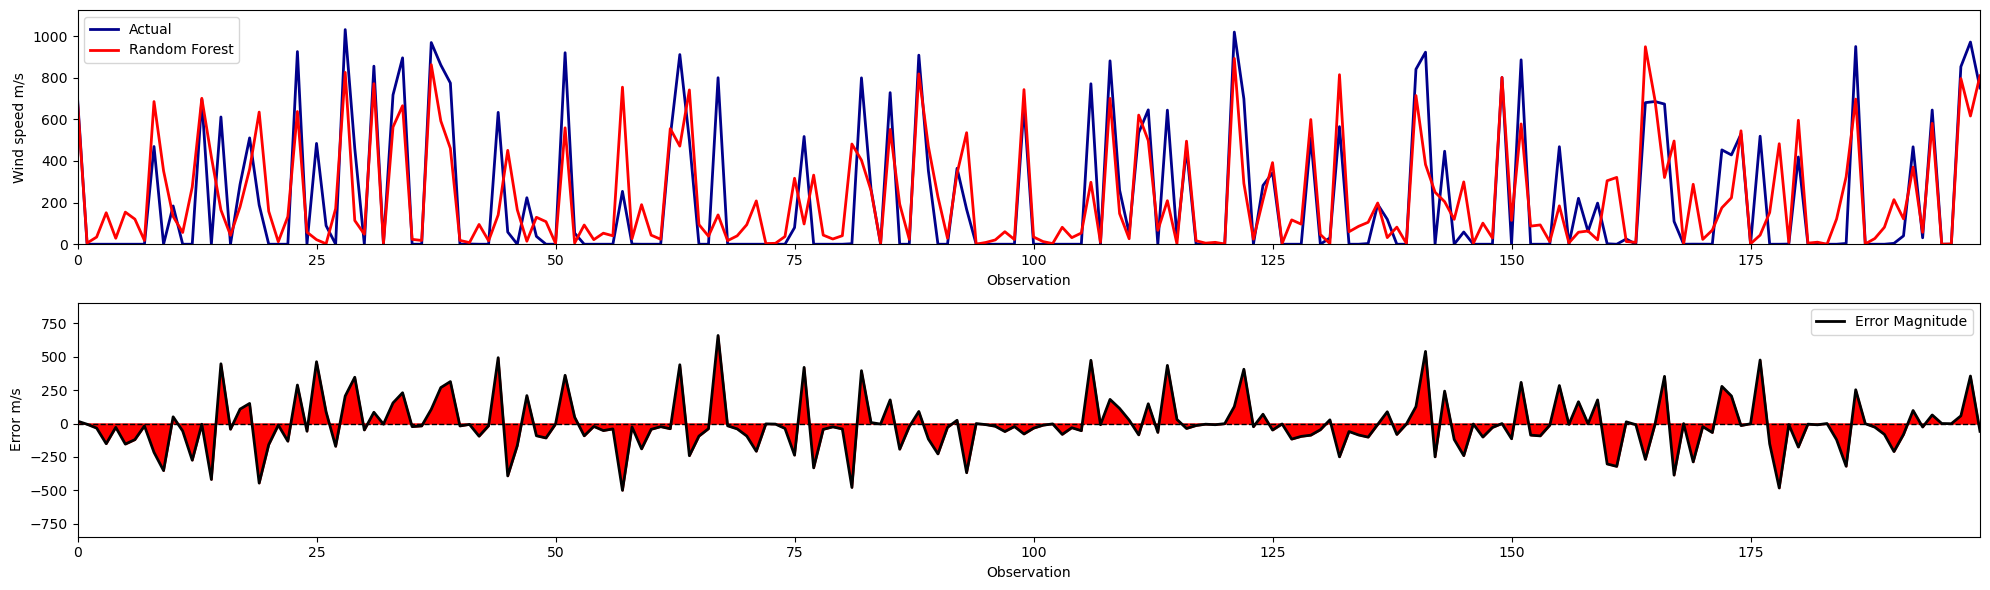

In [23]:
plot_actual_vs_predicted(test_y, predictions_rf, label='Random Forest')


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Machine regressor model
model_gbm = GradientBoostingRegressor(random_state=1000)
# Train the model
model_gbm.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_gbm = model_gbm.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_gbm, test_y, "Maroua Metrics Evaluation for Gradient Booting Machine Models")


Maroua Metrics Evaluation for Gradient Booting Machine Models
  Metric         Value
0     R²      0.588532
1   RMSE    206.118720
2  rRMSE      0.641458
3    MBE      0.485748
4   MABE    148.760313
5    MAE    148.760313
6    MSE  42484.926738
7    AIC 766073.589113


Metric         Value
0     R²      0.588532
1   RMSE    206.118720
2  rRMSE      0.641458
3    MBE      0.485748
4   MABE    148.760313
5    MAE    148.760313
6    MSE  42484.926738
7    AIC 766073.589113

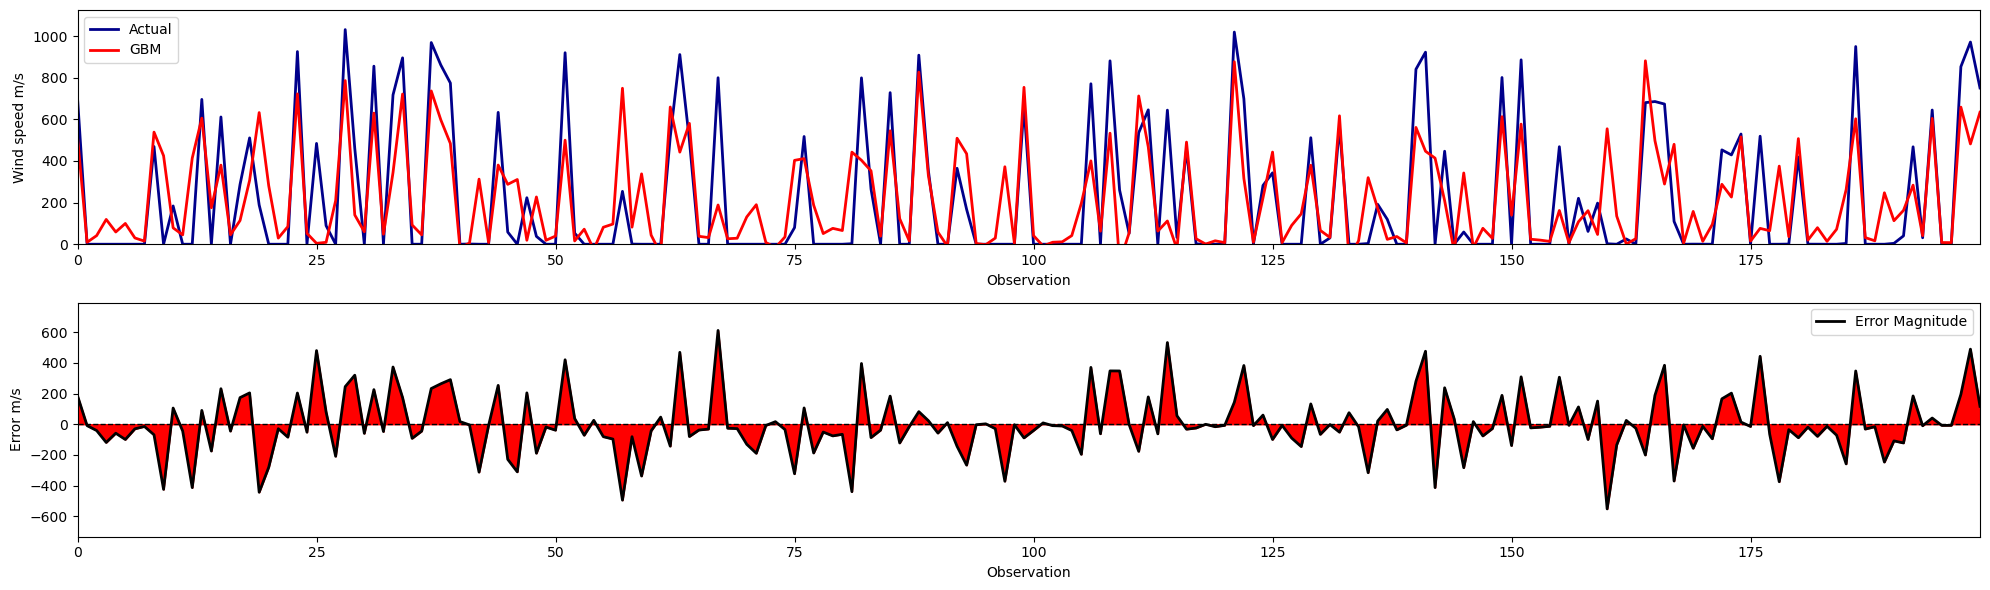

In [25]:
plot_actual_vs_predicted(test_y, predictions_gbm, label='GBM')


In [30]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a CatBoost Regressor model
model_catboost = CatBoostRegressor(random_state=1000)

# Train the model
model_catboost.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_catboost = model_catboost.predict(X_test_scaled)

# Evaluate the model
evaluate_model(predictions_catboost, y_test, "Maroua Metrics Evaluation for CatBoost Regressor Models")

NameError: name 'X_train_scaled' is not defined

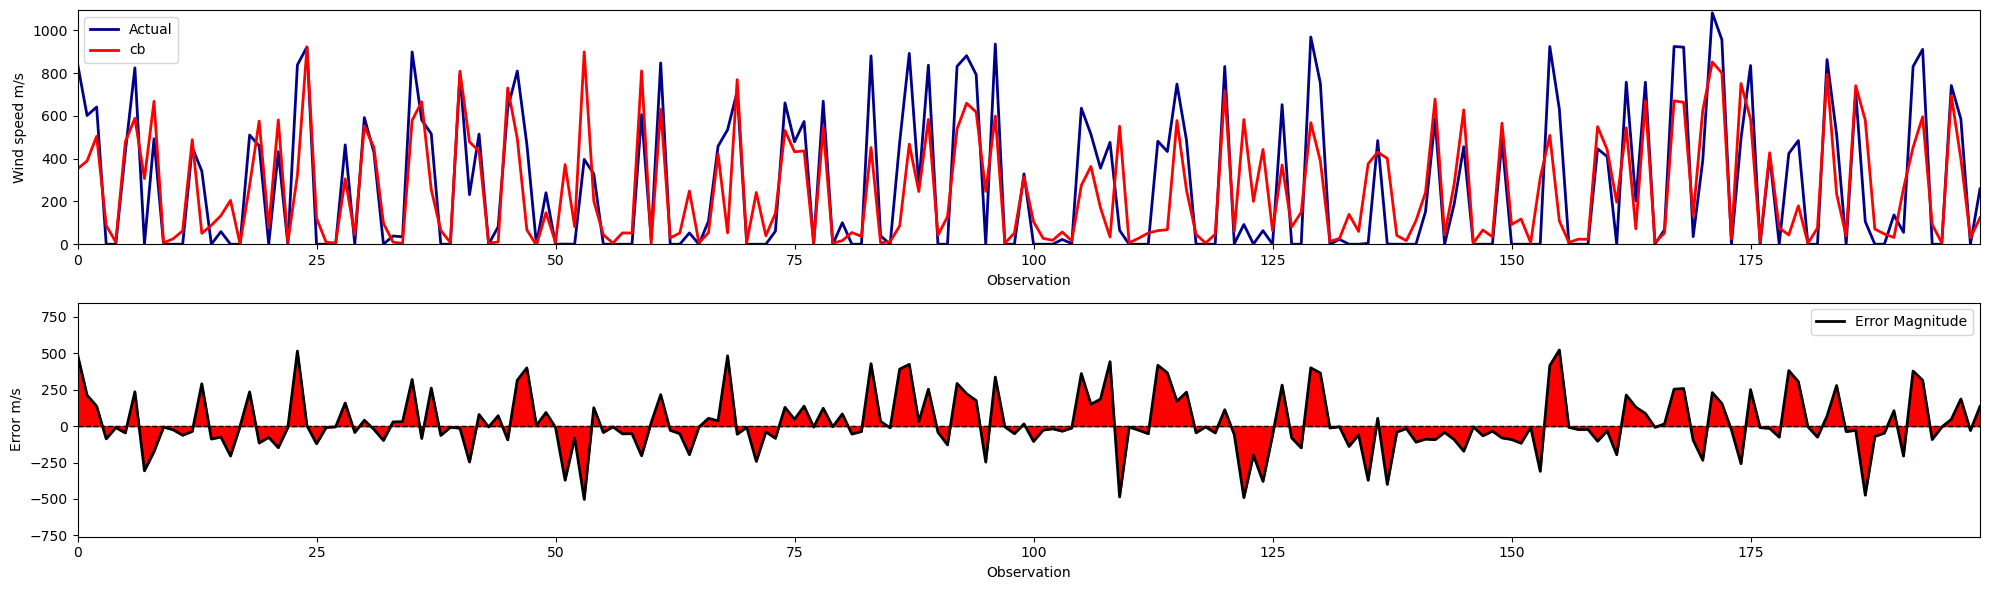

In [67]:
plot_actual_vs_predicted(y_test, predictions_catboost, label='cb')

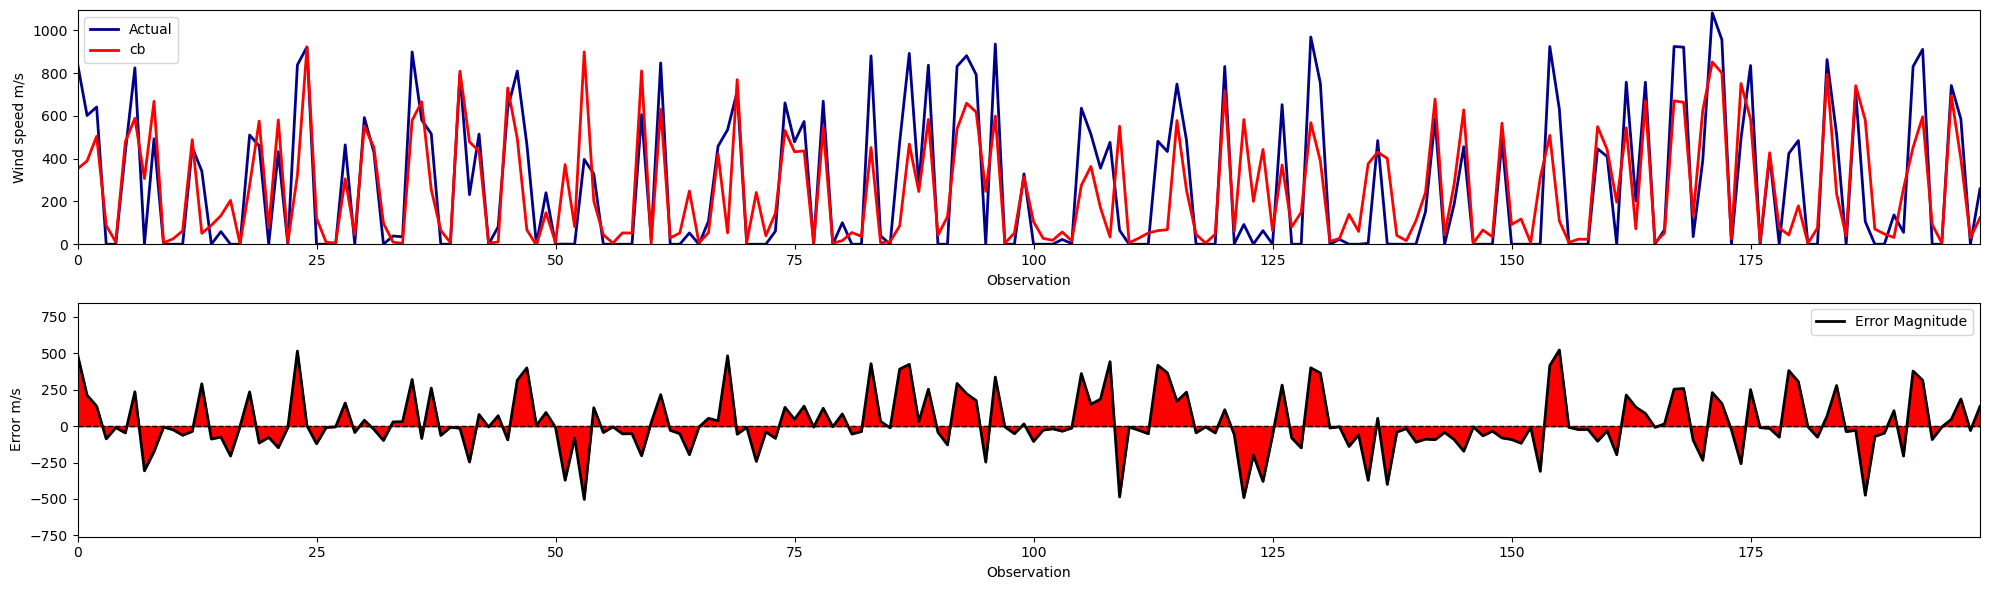

In [67]:
plot_actual_vs_predicted(y_test, predictions_catboost, label='cb')

In [75]:
print(f"test_y shape: {test_y.shape}")
print(f"predictions_catboost shape: {predictions_catboost.shape}")

test_y shape: (71885,)
predictions_catboost shape: (43131,)


In [76]:
test_y_sample = test_y[:len(predictions_catboost)].flatten()
predictions_sample = predictions_catboost.flatten()

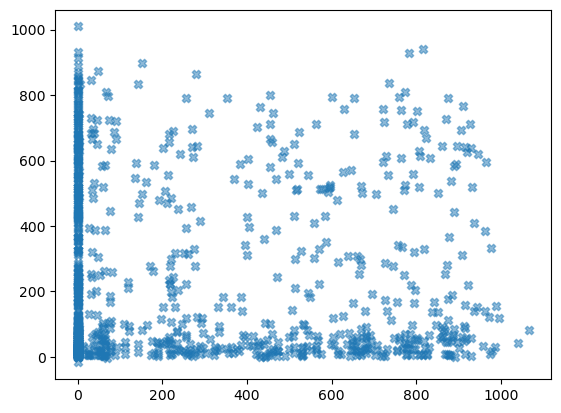

In [80]:
test_y_sample = test_y[:len(predictions_catboost)].flatten()
predictions_sample = predictions_catboost.flatten()

# Calculate R^2 score
r2 = r2_score(test_y_sample, predictions_sample)

# Plot the predictions
plot_predictions(test_y_sample, predictions_sample, 'CatBoost', markers[4], sample_size=1000)

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



# Create the XGBoost regressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
evaluate_model(y_pred, y_test, "Maroua Metrics Evaluation for xgb Regressor Models")

NameError: name 'X_train_scaled' is not defined

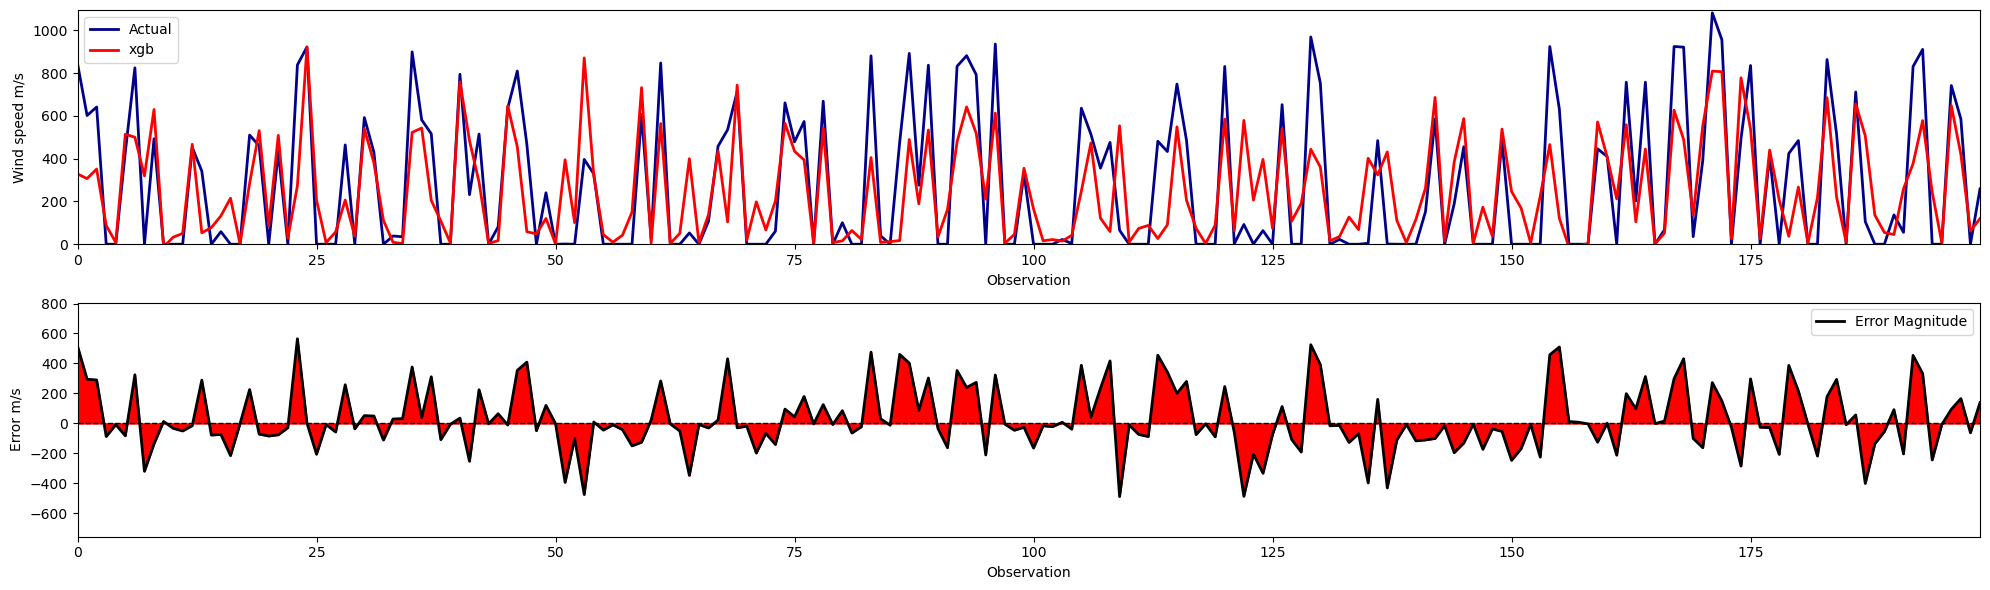

In [110]:
plot_actual_vs_predicted(y_test, y_pred, label='xgb')

In [56]:
from sklearn.svm import SVR
# Create and train the linear SVR model
svr_poly = SVR(kernel='linear')
svr_poly.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_svm = svr_poly.predict(test_X_scaled)
evaluate_model(predictions_svm, test_y, "Maroua Metrics Evaluation for Svm Model")


Maroua Metrics Evaluation for Svm Model
  Metric         Value
0     R²      0.488919
1   RMSE    229.717505
2  rRMSE      0.714899
3    MBE    -18.762363
4   MABE    181.158351
5    MAE    181.158351
6    MSE  52770.131903
7    AIC 781657.969498


Metric         Value
0     R²      0.488919
1   RMSE    229.717505
2  rRMSE      0.714899
3    MBE    -18.762363
4   MABE    181.158351
5    MAE    181.158351
6    MSE  52770.131903
7    AIC 781657.969498

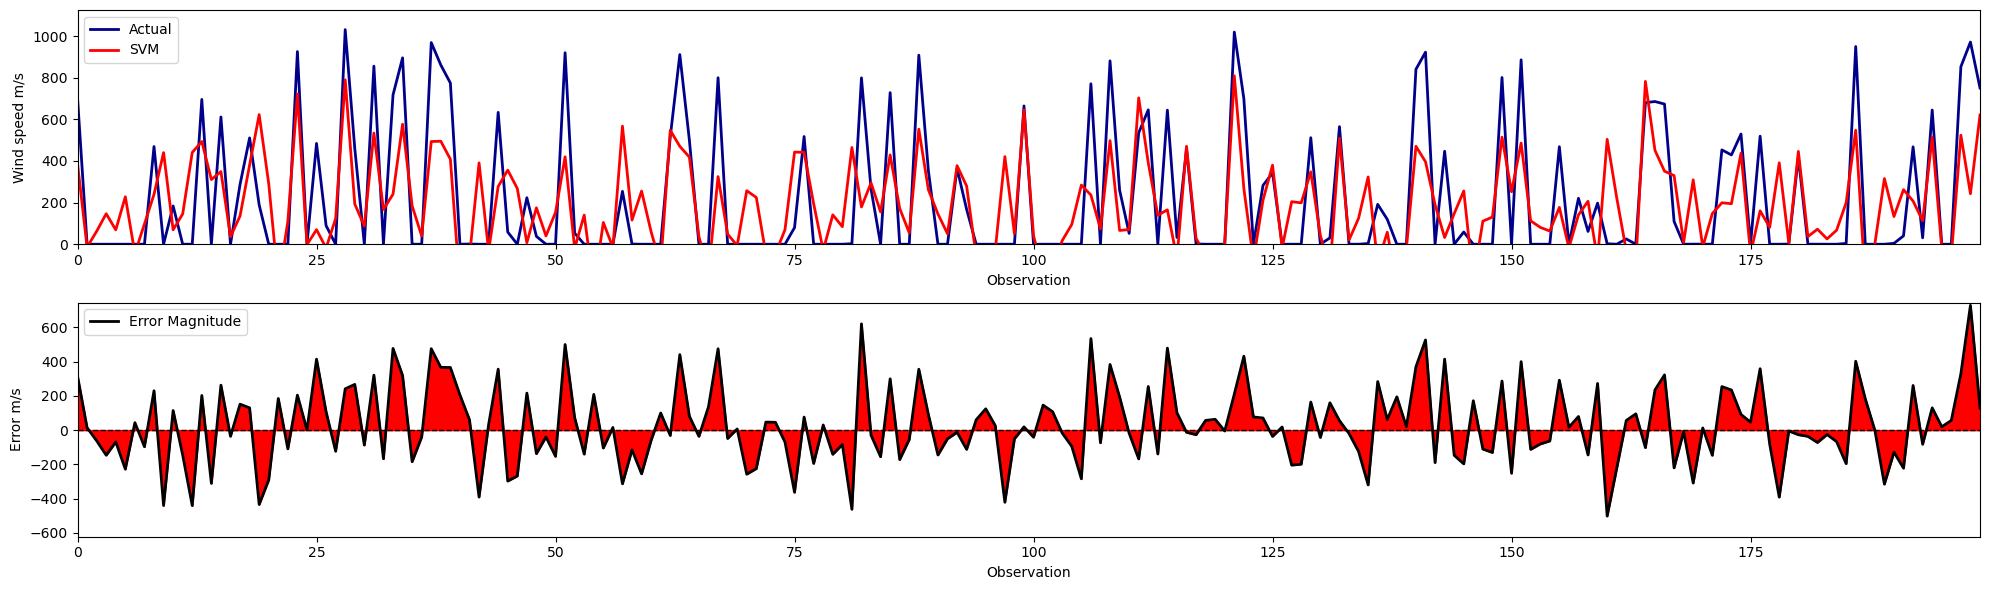

In [58]:
plot_actual_vs_predicted(test_y, predictions_svm, label='SVM')

In [33]:
from sklearn.neighbors import KNeighborsRegressor
# Create a k-Nearest Neighbors regressor model with k=5
model_knn = KNeighborsRegressor(n_neighbors=5)
# Train the model
model_knn.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_knn = model_knn.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_knn, test_y, "Maroua Metrics Evaluation for k-Nearest Neighbors Model (k=5)")


Maroua Metrics Evaluation for k-Nearest Neighbors Model (k=5)
  Metric         Value
0     R²      0.544011
1   RMSE    216.983454
2  rRMSE      0.675270
3    MBE      1.567055
4   MABE    145.900228
5    MAE    145.900228
6    MSE  47081.819314
7    AIC 773458.879811


Metric         Value
0     R²      0.544011
1   RMSE    216.983454
2  rRMSE      0.675270
3    MBE      1.567055
4   MABE    145.900228
5    MAE    145.900228
6    MSE  47081.819314
7    AIC 773458.879811

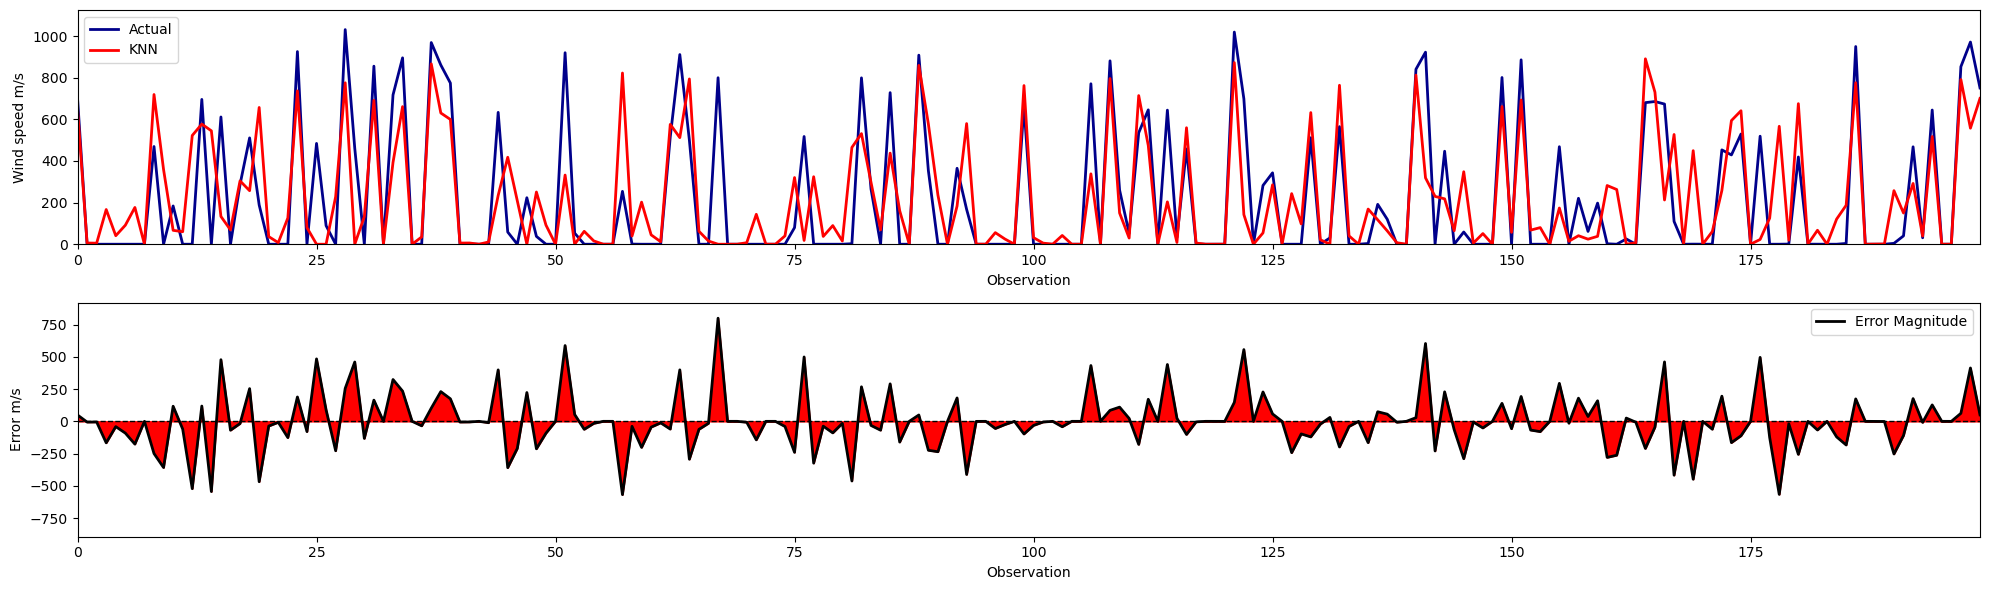

In [34]:
plot_actual_vs_predicted(test_y, predictions_knn, label='KNN')


In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Reshape data for LSTM (assuming train_X_scaled and test_X_scaled are 3D arrays)
train_X_lstm = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_lstm = test_X_scaled.reshape((test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
# Train the LSTM model
model_lstm.fit(train_X_lstm, train_y, epochs=10, batch_size=16, verbose=0)
# Make predictions on the test set
predictions_lstm = model_lstm.predict(test_X_lstm)
# Flatten predictions
predictions_lstm = predictions_lstm.flatten()
# Evaluate the model
evaluate_model(predictions_lstm, test_y, "Buea south west Metrics Evaluation for LSTM Model")


2247/2247 [==============================] - 4s 1ms/step
Buea south west Metrics Evaluation for LSTM Model
  Metric         Value
0     R²      0.595021
1   RMSE    204.487001
2  rRMSE      0.636380
3    MBE     -1.244214
4   MABE    144.520196
5    MAE    144.520196
6    MSE  41814.933446
7    AIC 764930.918607


Metric         Value
0     R²      0.595021
1   RMSE    204.487001
2  rRMSE      0.636380
3    MBE     -1.244214
4   MABE    144.520196
5    MAE    144.520196
6    MSE  41814.933446
7    AIC 764930.918607

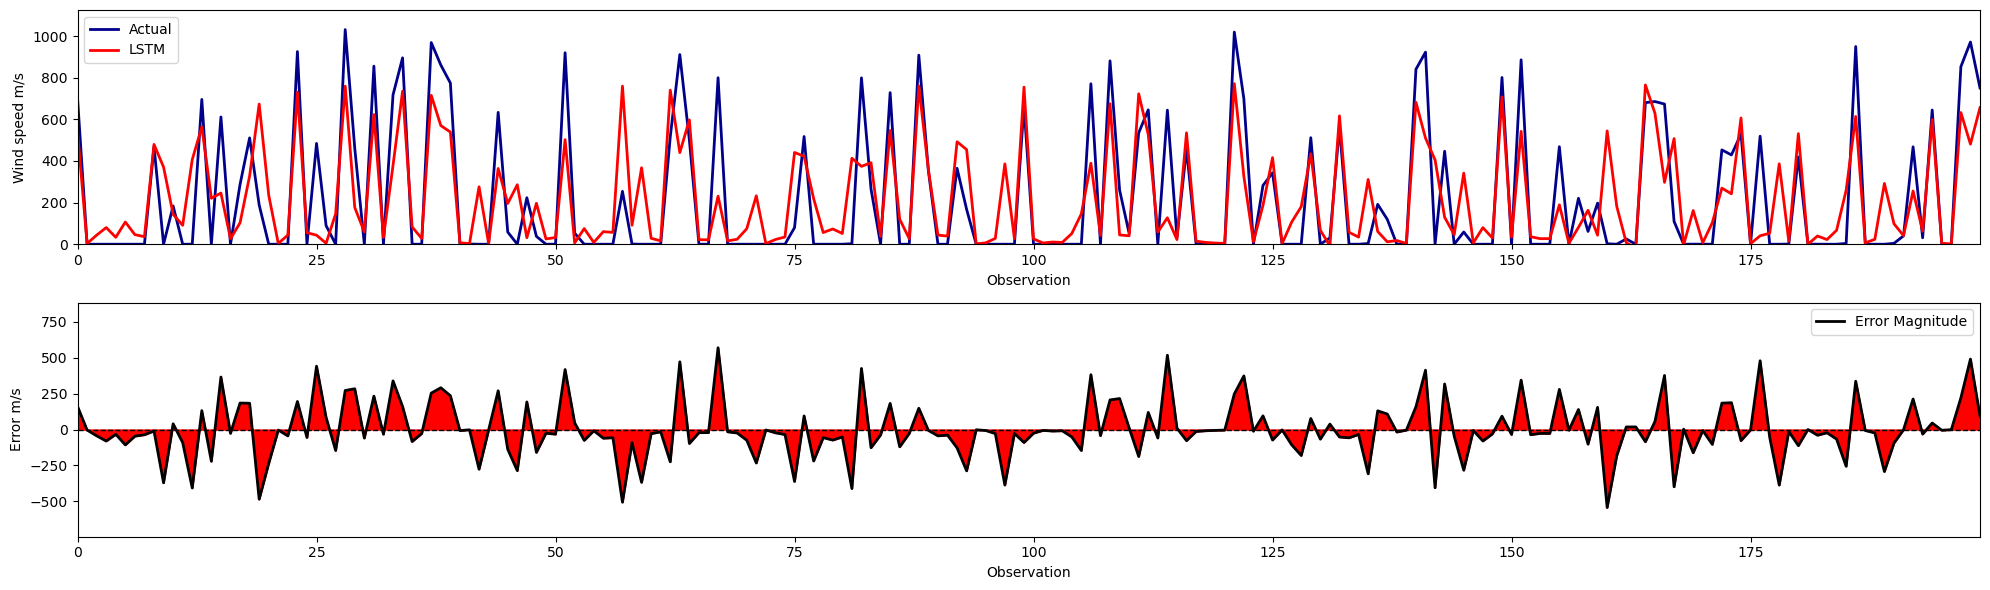

In [36]:
plot_actual_vs_predicted(test_y, predictions_lstm, label='LSTM')


In [37]:
from sklearn.neural_network import MLPRegressor
# Create a Multi-Layer Perceptron (MLP) regressor model
model_ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
# Train the ANN model
model_ann.fit(train_X_scaled, train_y)
# Make predictions on the test set
predictions_ann = model_ann.predict(test_X_scaled)
# Evaluate the model
evaluate_model(predictions_ann, test_y, "ANN Metrics Evaluation")

C:\Users\Millen\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN Metrics Evaluation
  Metric         Value
0     R²      0.612823
1   RMSE    199.942130
2  rRMSE      0.622236
3    MBE    -10.148863
4   MABE    138.243616
5    MAE    138.243616
6    MSE  39976.855279
7    AIC 761699.481794


Metric         Value
0     R²      0.612823
1   RMSE    199.942130
2  rRMSE      0.622236
3    MBE    -10.148863
4   MABE    138.243616
5    MAE    138.243616
6    MSE  39976.855279
7    AIC 761699.481794

plot_actual_vs_predicted(test_y, predictions_ann, label='ANN')


In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title, batch_size=1000):
    # Ensure batch_size is an integer
    batch_size = int(batch_size)

    # Calculate metrics in batches
    rmse_batches = []
    mbe_batches = []
    mabe_batches = []
    mae_batches = []
    mse_batches = []
    for i in range(0, len(predictions), batch_size):
        batch_predictions = predictions[i:i+batch_size]
        batch_test_y = test_y[i:i+batch_size]

        # RMSE
        rmse_batches.append(np.sqrt(np.mean((batch_predictions - batch_test_y)**2)))
        # MBE
        mbe_batches.append(np.mean(batch_predictions - batch_test_y))
        # MABE
        mabe_batches.append(np.mean(np.abs(batch_predictions - batch_test_y)))
        # MAE
        mae_batches.append(mean_absolute_error(batch_test_y, batch_predictions))
        # MSE
        mse_batches.append(mean_squared_error(batch_test_y, batch_predictions))

    # Aggregate metrics
    rmse_rf = np.mean(rmse_batches)
    mbe_rf = np.mean(mbe_batches)
    mabe_rf = np.mean(mabe_batches)
    mae_rf = np.mean(mae_batches)
    mse_rf = np.mean(mse_batches)

    # Calculate other metrics
    r2_rf = r2_score(test_y, predictions)
    rrmse_rf = rmse_rf / np.std(test_y)
    rrmse = rmse_rf / np.mean(test_y)

    # Calculate Akaike Information Criterion (AIC)
    aic_rf = len(test_y) * np.log(mse_rf) + 2

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE', 'AIC'],
        'Value': [r2_rf, rmse_rf, rrmse, mbe_rf, mabe_rf, mae_rf, mse_rf, aic_rf]
    })

    # Print the evaluation table with formatted values
    pd.options.display.float_format = '{:.6f}'.format
    print(title)
    print(evaluation_table)

    return evaluation_table

# Example usage (assuming you have predictions and test_y already):
# evaluation_table = evaluate_model(predictions, test_y, "Model Evaluation Metrics")

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(test_y, predictions, label, sample_size=200):
    # Initialize error curve array
    error_curve = np.zeros_like(test_y)
    
    # Calculate error curve in batches
    for i in range(0, len(test_y), sample_size):
        batch_test_y = test_y[i:i+sample_size]
        batch_predictions = predictions[i:i+sample_size].flatten() # Flatten predictions to match batch_test_y shape
        error_curve[i:i+len(batch_test_y)] = batch_test_y - batch_predictions
    
    # Set figure size
    plt.figure(figsize=(20, 6))
    
    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Wind speed m/s')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions))) # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    
    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 2)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error m/s')
    plt.ylim(bottom=min(error_curve), top=max(error_curve)) # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1) # Set x-axis limits to start at 0
    plt.legend()
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

input_shape = train_X_scaled.shape[1]

# Define the model architecture
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model_dl.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model_dl.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_dl = model_dl.predict(test_X_scaled)

# Evaluate the model
results = model_dl.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model_dl.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model using your custom evaluation function
evaluation_table_dl = evaluate_model(predictions_dl, test_y, "FNN Metrics Evaluation", batch_size=1000)

Epoch 1/5
21566/21566 [==============================] - 37s 2ms/step - loss: 48695.6953 - root_mean_squared_error: 220.6710 - r_squared: -3702805760.0000 - val_loss: 44061.9844 - val_root_mean_squared_error: 209.9095 - val_r_squared: -3394172160.0000
Epoch 2/5
21566/21566 [==============================] - 36s 2ms/step - loss: 44364.7070 - root_mean_squared_error: 210.6293 - r_squared: -3191088896.0000 - val_loss: 42893.4219 - val_root_mean_squared_error: 207.1073 - val_r_squared: -3162853632.0000
Epoch 3/5
21566/21566 [==============================] - 39s 2ms/step - loss: 43475.2031 - root_mean_squared_error: 208.5071 - r_squared: -2735853056.0000 - val_loss: 42182.8828 - val_root_mean_squared_error: 205.3847 - val_r_squared: -3095772160.0000
Epoch 4/5
21566/21566 [==============================] - 48s 2ms/step - loss: 42855.6328 - root_mean_squared_error: 207.0160 - r_squared: -2785156096.0000 - val_loss: 41614.8906 - val_root_mean_squared_error: 203.9973 - val_r_squared: -30615961

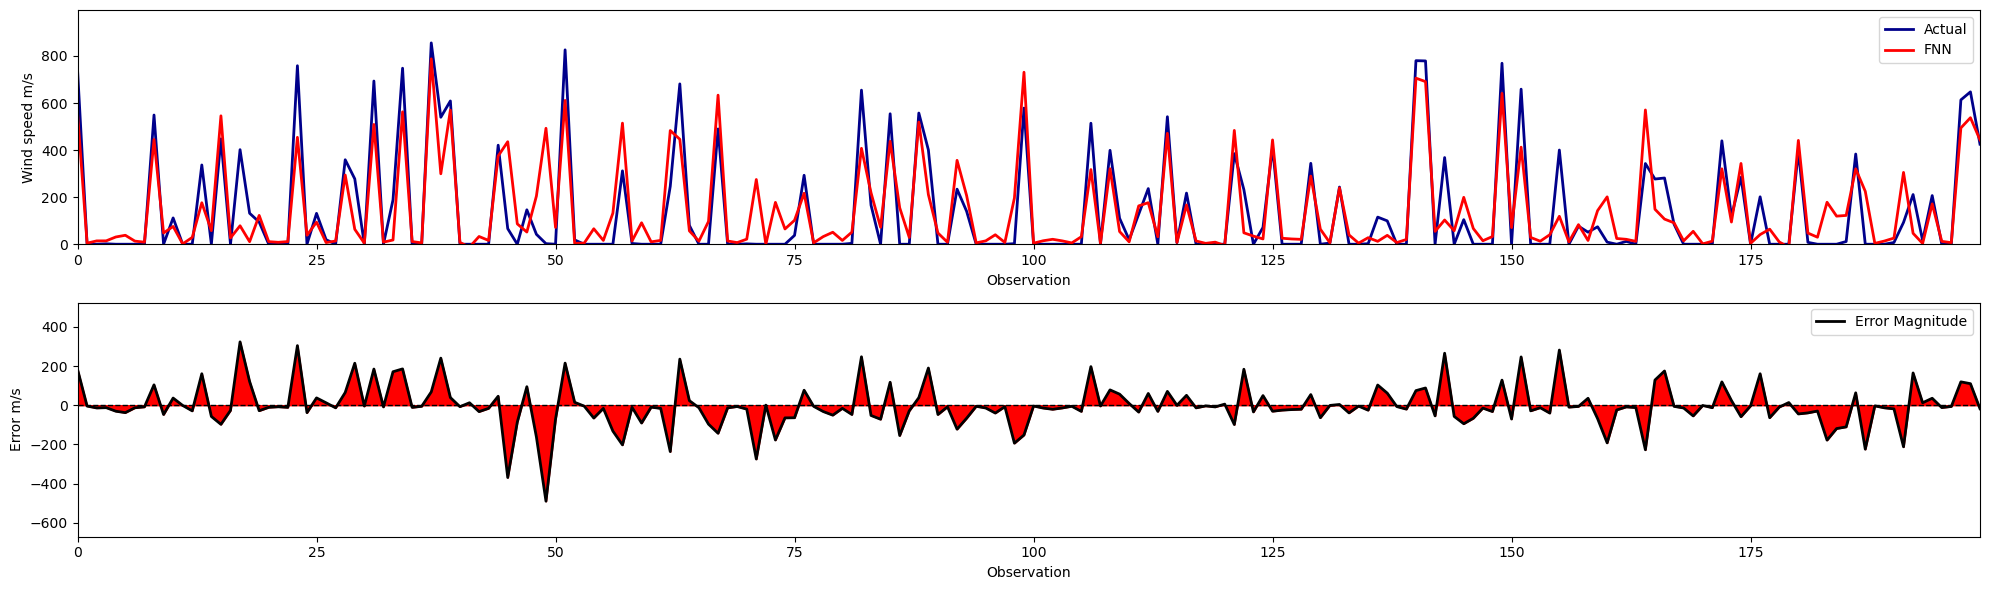

In [37]:
plot_actual_vs_predicted(test_y, predictions_dl, label='FNN')


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Reshape input data to 3D for RNN (samples, timesteps, features)
# Here we assume each sample is a single timestep
train_X_scaled = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
valid_X_scaled = np.reshape(valid_X_scaled, (valid_X_scaled.shape[0], 1, valid_X_scaled.shape[1]))
test_X_scaled = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Define the RNN model architecture
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(1, train_X_scaled.shape[2])),
    Dense(1) # Output layer with one unit for regression
])

# Compile the model
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model_rnn.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_data=(valid_X_scaled, valid_y), verbose=1)

# Make predictions on the test set
predictions_rnn = model_rnn.predict(test_X_scaled)

# Evaluate the model
evaluate_model(predictions_rnn, test_y, "RNN Metrics Evaluation")

Epoch 1/5
26957/26957 [==============================] - 62s 2ms/step - loss: 54289.7969 - val_loss: 47865.9883
Epoch 2/5
26957/26957 [==============================] - 59s 2ms/step - loss: 47070.0586 - val_loss: 46662.4180
Epoch 3/5
26957/26957 [==============================] - 60s 2ms/step - loss: 46364.6445 - val_loss: 46185.5703
Epoch 4/5
26957/26957 [==============================] - 65s 2ms/step - loss: 45983.0547 - val_loss: 45838.9922
Epoch 5/5
2247/2247 [==============================] - 3s 1ms/step
RNN Metrics Evaluation
  Metric         Value
0     R²      0.558803
1   RMSE    398.502177
2  rRMSE      1.640227
3    MBE      4.807247
4   MABE    307.634956
5    MAE    158.509632
6    MSE  45557.241217
7    AIC 771092.616776


Metric         Value
0     R²      0.558803
1   RMSE    398.502177
2  rRMSE      1.640227
3    MBE      4.807247
4   MABE    307.634956
5    MAE    158.509632
6    MSE  45557.241217
7    AIC 771092.616776

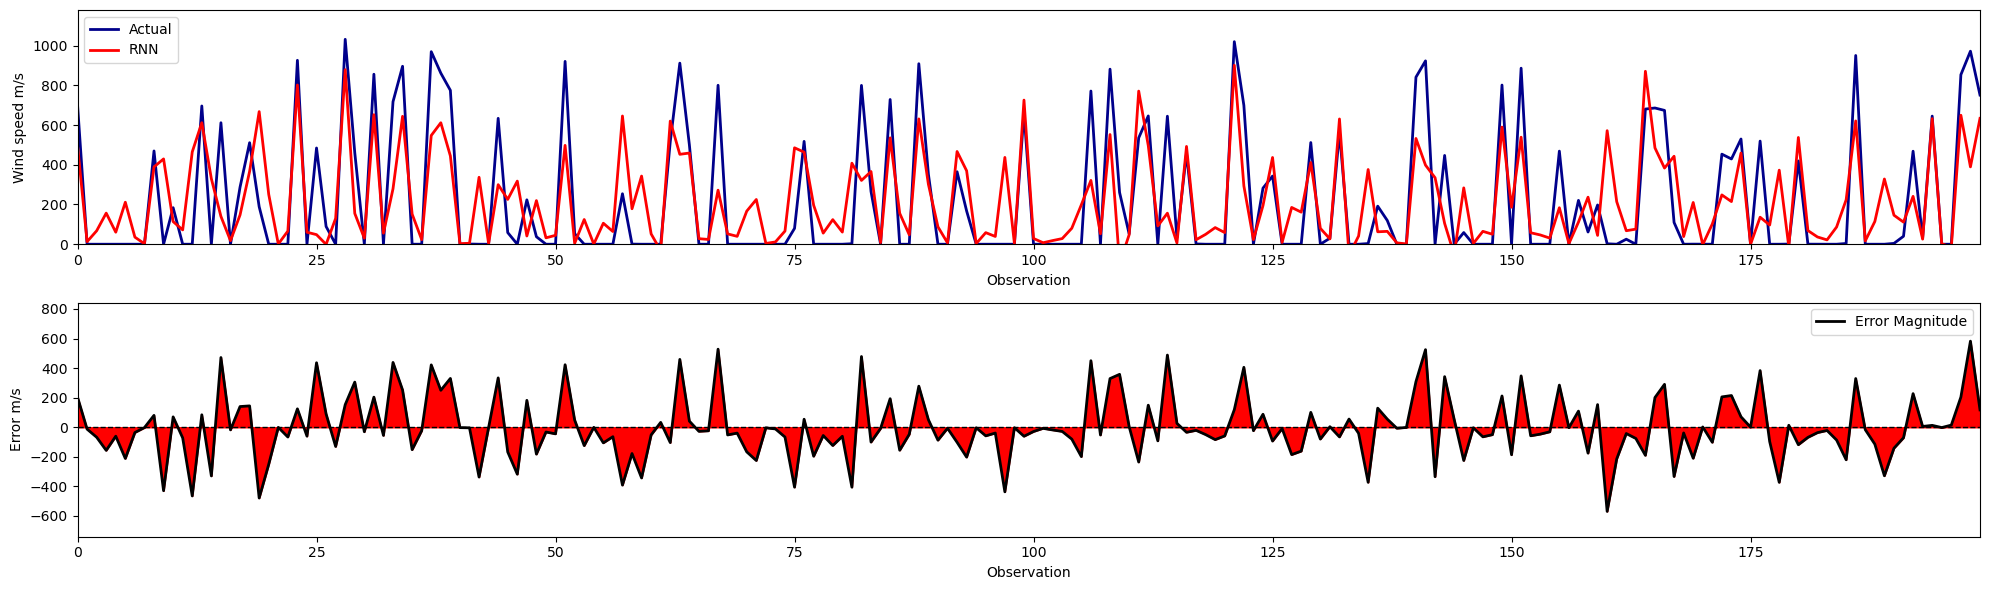

In [42]:
plot_actual_vs_predicted(test_y, predictions_rnn, label='RNN')

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam
# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())
# Ensure the input data is reshaped correctly
    train_X_cnn = train_X_scaled.reshape((train_X_scaled.shape[0], train_X_scaled.shape[1], 1))
    test_X_cnn = test_X_scaled.reshape((test_X_scaled.shape[0], test_X_scaled.shape[1], 1))
# Define the CNN model architecture
    input_shape = (train_X_cnn.shape[1], train_X_cnn.shape[2])
    model_cnn = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=input_shape),
    Dropout(0.2),
    Conv1D(32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1) # Output layer with one unit for regression
    ])
# Compile the model with custom R² metric
    model_cnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])
# Train the CNN model
    history = model_cnn.fit(train_X_cnn, train_y, epochs=10, batch_size=8, validation_split=0.2, verbose=1)
# Make predictions on the test set
    predictions_cnn = model_cnn.predict(test_X_cnn)
# Evaluate the model
    results = model_cnn.evaluate(test_X_cnn, test_y, verbose=0)
# Print all metrics
    metric_names = model_cnn.metrics_names
    for i, metric_name in enumerate(metric_names):
        print(f"{metric_name}: {results[i]}")
# Evaluate the model with custom function
    evaluate_model(predictions_cnn, test_y, "CNN Metrics Evaluation")


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Function to scale the dataset
def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    X = X.reshape(X.shape[0], -1)  # Flatten for Dense layer input
    return X, y

# Assuming train, valid, and test are your dataframes
train_X_cnn, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_cnn, test_y = scale_dataset(test)

# Print the shapes for debugging
print("Shape of train_X_scaled:", train_X_cnn.shape)
print("Shape of valid_X_scaled:", valid_X_scaled.shape)
print("Shape of test_X_scaled:", test_X_cnn.shape)

# # Define the CNN model architecture
# input_shape = (train_X_cnn.shape[1],)
# model_cnn = Sequential([
#     Conv1D(64, kernel_size=2, activation='relu', input_shape=input_shape),
#     Dropout(0.2),
#     Conv1D(32, kernel_size=2, activation='relu'),
#     Flatten(),
#     Dense(32, activation='relu'),
#     Dense(1) # Output layer with one unit for regression
# ])


# Define the model architecture
model_cnn = Sequential([
    Dense(64, activation='relu', input_shape=(train_X_cnn.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])


# Compile the model with custom R² metric
model_cnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the CNN model
history = model_cnn.fit(train_X_cnn, train_y, epochs=10, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_cnn = model_cnn.predict(test_X_cnn)

# Evaluate the model
results = model_cnn.evaluate(test_X_cnn, test_y, verbose=0)

# Print all metrics
metric_names = model_cnn.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model with custom function
evaluate_model(predictions_cnn, test_y, "CNN Metrics Evaluation")

Shape of train_X_scaled: (215654, 3)
Shape of valid_X_scaled: (71885, 3)
Shape of test_X_scaled: (71885, 3)
Epoch 1/10
10010/21566 [============>.................] - ETA: 16s - loss: 52103.1367 - root_mean_squared_error: 228.2611 - r_squared: -2492263936.0000

KeyboardInterrupt: 

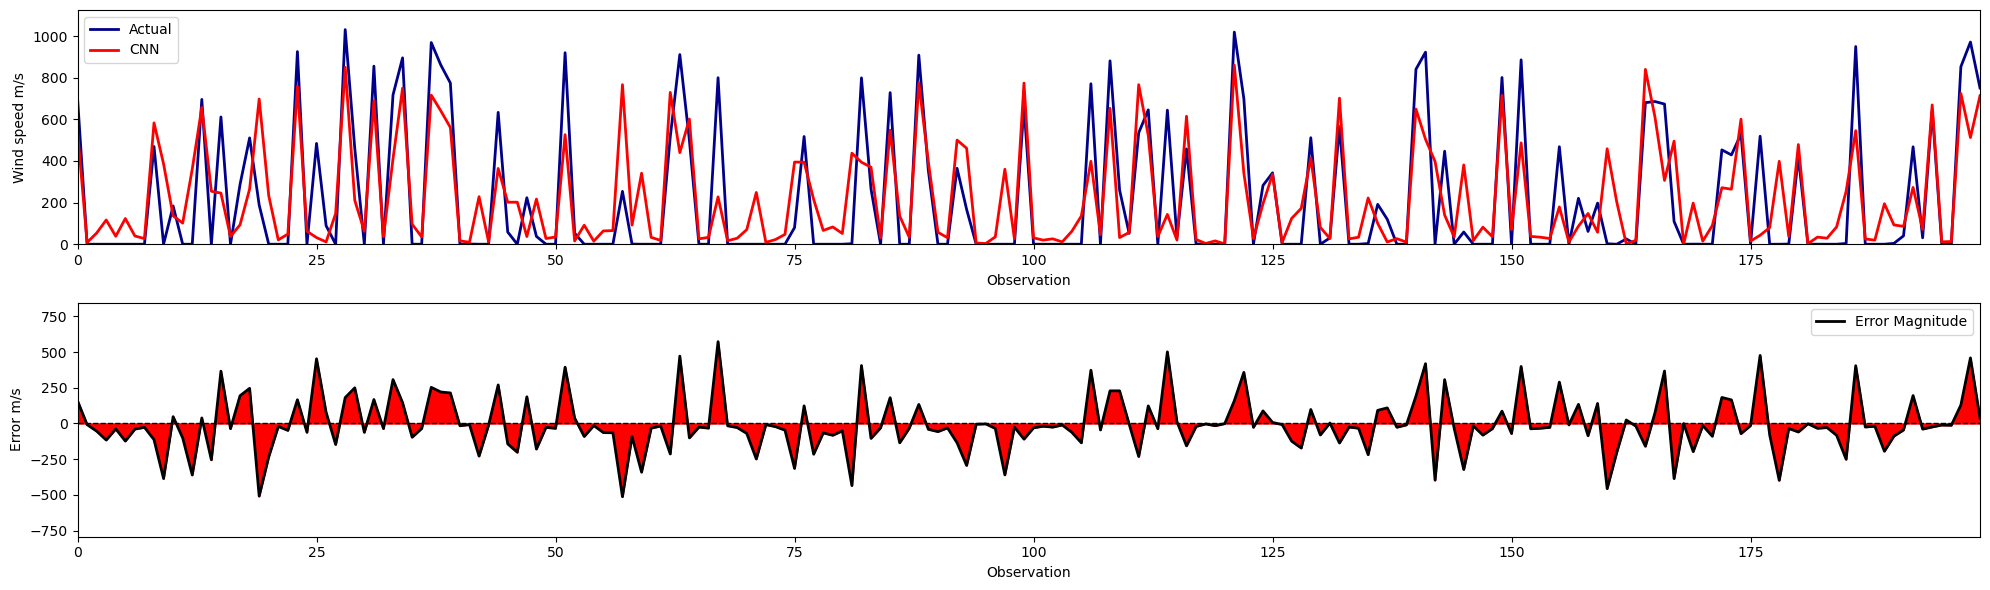

In [48]:
plot_actual_vs_predicted(test_y, predictions_cnn, label='CNN')


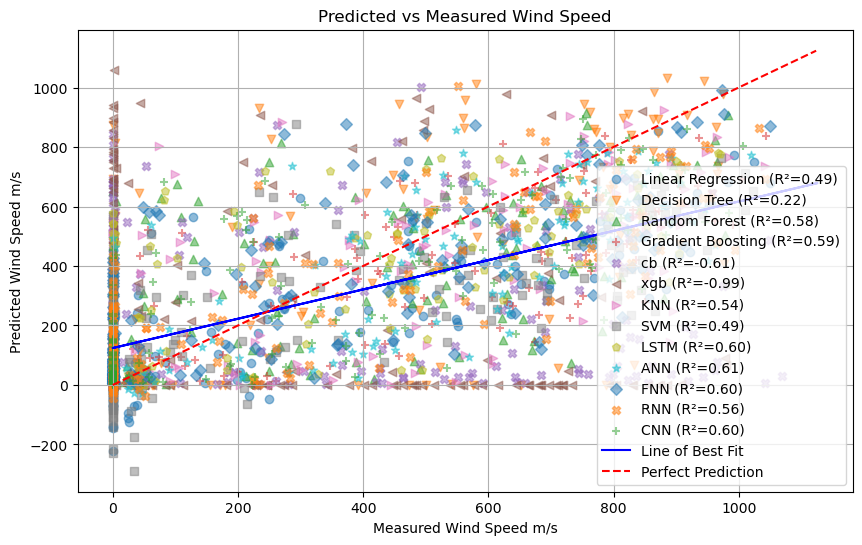

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Function to plot scatter plot for each model with different markers
def plot_predictions(test_y, predictions, model_name, marker, sample_size=200):
    if len(test_y) > len(predictions):
       test_y = test_y[:len(predictions)]
    elif len(predictions) > len(test_y):
       predictions = predictions[:len(test_y)]
    # Randomly sample 200 points for plotting
    sample_indices = np.random.choice(len(test_y), size=sample_size, replace=False)
    test_y_sample = test_y[sample_indices].flatten()
    predictions_sample = predictions[sample_indices].flatten()

    # Calculate R^2 score
    r2 = r2_score(test_y, predictions)

    # Plot scatter plot with specific marker
    plt.scatter(test_y_sample, predictions_sample, label=f"{model_name} (R²={r2:.2f})", alpha=0.5, marker=marker)

# Define marker styles for different models
markers = ['o', 'v', '^','+','X', '<', '>', 's', 'p', '*', 'D', 'X', '+']

# Combine all predictions for a single line of best fit
all_predictions = np.concatenate([
    predictions_reg.flatten(),
    predictions_dt.flatten(),
    predictions_rf.flatten(),
    predictions_gbm.flatten(),
    predictions_catboost.flatten(),
    y_test.flatten(),
    predictions_svm.flatten(),
    predictions_knn.flatten(),
    predictions_lstm.flatten(),
    predictions_ann.flatten(),
    predictions_dl.flatten(),
    predictions_rnn.flatten(),
    predictions_cnn.flatten(),
])

# Flatten test_y to match the shape of all_predictions
test_y_flat = test_y.flatten()

# Calculate the line of best fit for all predictions
z = np.polyfit(test_y_flat, all_predictions[:len(test_y_flat)], 1)
p = np.poly1d(z)

# Plot settings
plt.figure(figsize=(10, 6))

# Plot scatter plot for each model with different markers
plot_predictions(test_y, predictions_reg, 'Linear Regression', markers[0])
plot_predictions(test_y, predictions_dt, 'Decision Tree', markers[1])
plot_predictions(test_y, predictions_rf, 'Random Forest', markers[2])
plot_predictions(test_y, predictions_gbm, 'Gradient Boosting', markers[3])
plot_predictions(test_y, predictions_catboost, 'cb', markers[4])
plot_predictions(test_y, y_test, 'xgb', markers[5])
plot_predictions(test_y, predictions_knn, 'KNN', markers[6])
plot_predictions(test_y, predictions_svm, 'SVM', markers[7])
plot_predictions(test_y, predictions_lstm, 'LSTM', markers[8])
plot_predictions(test_y, predictions_ann, 'ANN', markers[9])
plot_predictions(test_y, predictions_dl, 'FNN', markers[10])
plot_predictions(test_y, predictions_rnn, 'RNN', markers[11])
plot_predictions(test_y, predictions_cnn, 'CNN', markers[12])

# Plot line of best fit for all predictions in blue
plt.plot(test_y, p(test_y.flatten()), color='blue', label='Line of Best Fit')


plt.plot([min(test_y_sample), max(test_y_sample)], [min(test_y_sample), max(test_y_sample)], 'r--', label='Perfect Prediction')
   
# Plot settings
plt.xlabel('Measured Wind Speed m/s')
plt.ylabel('Predicted Wind Speed m/s')
plt.title('Predicted vs Measured Wind Speed')
plt.legend()
plt.grid(True)
plt.show()




